# Seaborn - Scatterplots, Line Plots, & Distribution 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style="darkgrid")

## 1. Scatter Plots
* being able to view the data in this way often reveals information about relationships within the data

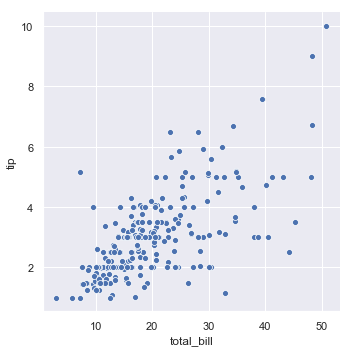

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

* more dimensions (variables) can be added by using various colors and shapes
* 4 dimensions can be viewed below

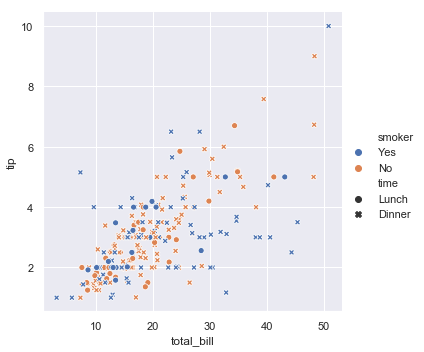

In [3]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

* the variable represented by color, in the above example is categorical
* the hue semantic can be numeric as well

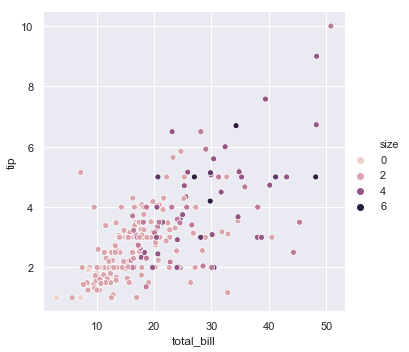

In [4]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

* the size of points, acts as an additional semantic variable, and can be customized

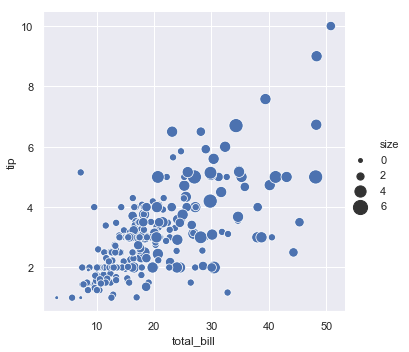

In [5]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

# 2. Line Plots
* allows understanding of a variable over time, and in working with continuous variables
* can use lineplot( ) - or relplot(), with kind='line'

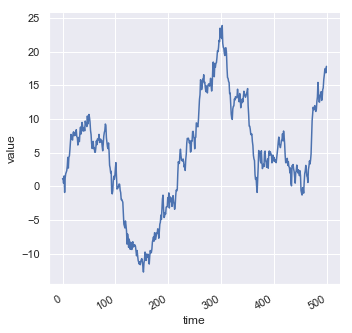

In [6]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

* by default, y is drawn as a function of x - this can be altered

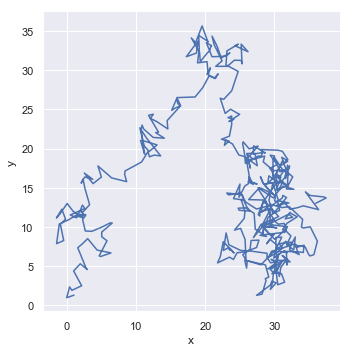

In [7]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

#### Aggregation & Uncertainty
* many complex datasets can have multiple observations for the same x value
* by default seaborn aggregates multiple measurements at each x value by:
    * plotting the mean
    * plotting the 95% confidence interval around the mean

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


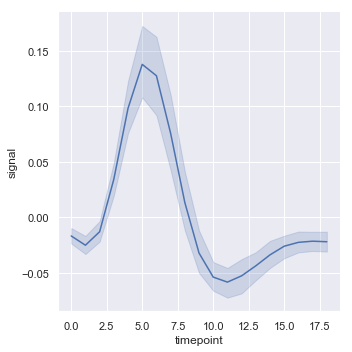

In [8]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

* confidence intervals (produced by bootstrapping) can take time 
    * and can be disabled with the argument, ci=None
* confidence intervals can also be set to the standard deviation

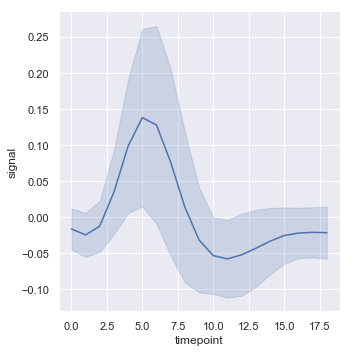

In [9]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

#### Plotting Subsets of data
* using semantics in lineplot( )

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


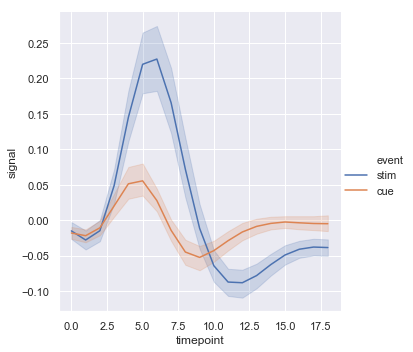

In [10]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

* style semantics can be added here

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


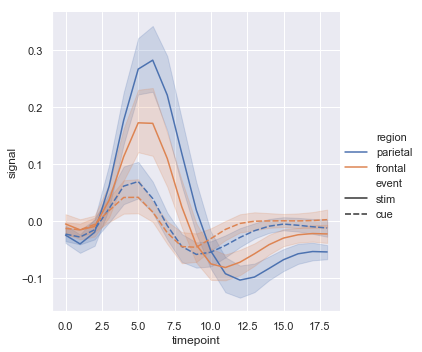

In [11]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri);

* multiple measures of the data can be plotted together - with or without distinction

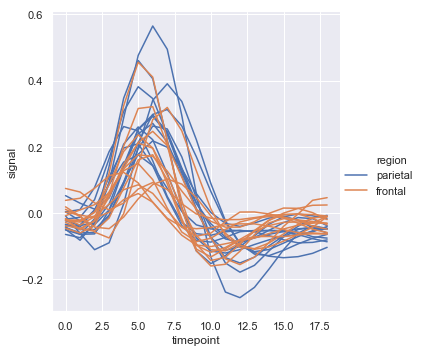

In [12]:
sns.relplot(x="timepoint", y="signal", hue="region", units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

* the default colormap, depends on whether the hue semantic is categorical or numerical
* even when numerical, it is possible to be poorly represented on a color scale
    * this can happen when hue variable values are logarithmically scaled

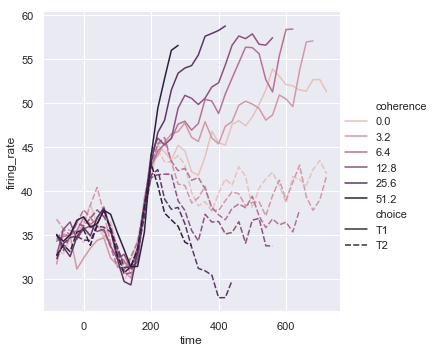

In [14]:
dots = sns.load_dataset("dots").query("align == 'dots'")

palette = sns.cubehelix_palette(light=.8, n_colors=6)

sns.relplot(x="time", y="firing_rate", hue="coherence", style="choice", palette=palette,
            kind="line", data=dots);

* the size (thickness) of the variable can be changed too

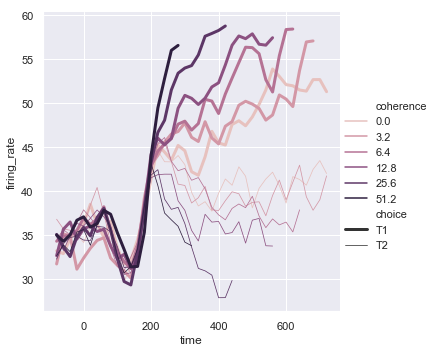

In [15]:
sns.relplot(x="time", y="firing_rate", hue="coherence", size="choice", palette=palette,
           kind="line", data=dots);

# Viewing Multiple Relationships with Facets
* relplot( ) is based on FacetGrid - so it is easy to make more than 1 plot
* this is beneficial for viewing how a relationship between 2 variables, is influenced by 1+ other variables

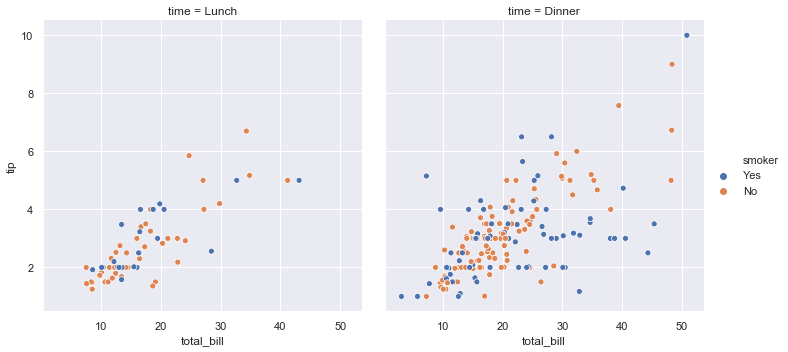

In [16]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

#### View the influence of 2 variables
* facet the columns and rows - by manipulating the semantics, col= and row=

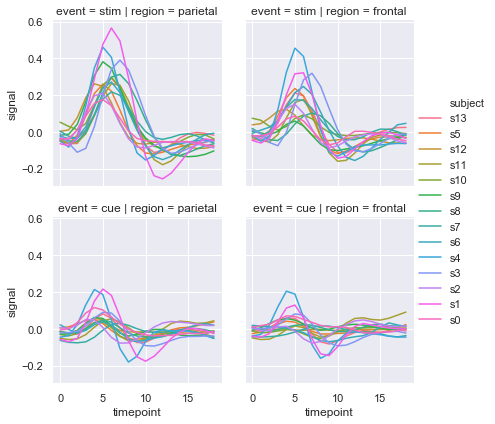

In [17]:
sns.relplot(x="timepoint", y="signal", hue="subject", col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

#### "Lattice" Plots ("small-multitudes"
* when viewing many effects of a variables influence:
    * it can be faceted on columns + then wrapped onto rows

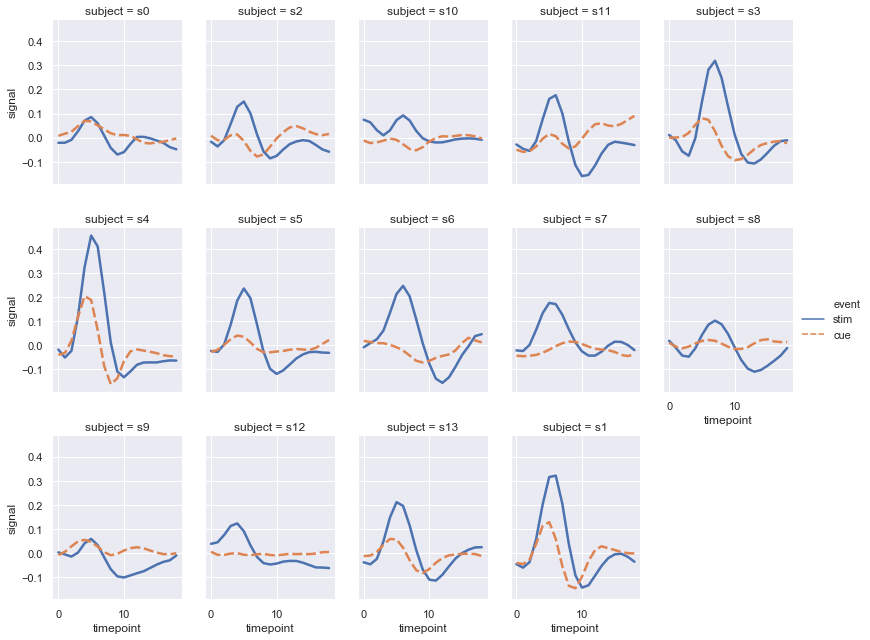

In [18]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event", col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5, kind="line",
            data=fmri.query("region == 'frontal'"));

# 3. Visualizing Dataset Distribution
## Examining univariate and bivariate distributions

In [19]:
from scipy import stats

sns.set(color_codes=True)

## Univariate
### Distplot( ) - the easiest way to view a Univariate distribution
* by default, seaborn draws a Histogram - and fits a Kernel Density Estimation (KDE)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


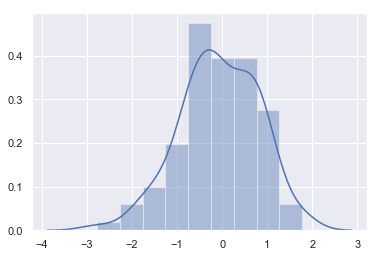

In [20]:
x = np.random.normal(size=100)

sns.distplot(x);

#### Remove the Density curve - Add a Rug plot
* Rug plots can be added individually as rugplot( )
    * or added as an argument of distplot( )

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


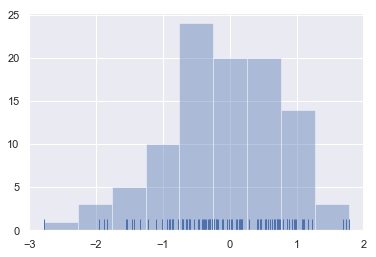

In [21]:
sns.distplot(x, kde=False, rug=True);

#### Similarly, remove the histogram - Add the KDE curve with the Rug plot

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


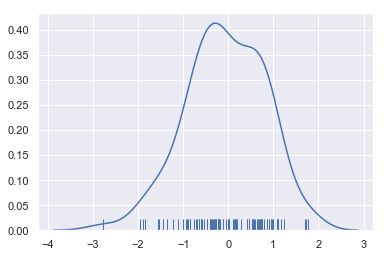

In [22]:
sns.distplot(x, hist=False, rug=True);

### KDE - supplemental info
#### Producing a KDE curve is computationally taxing - and taking several steps
* 1st, each observation is replaced by Gaussian distribution (centered at the observation)
* Each of the Gaussian curves is summed - Resulting curve is normalized (AOC = 1)

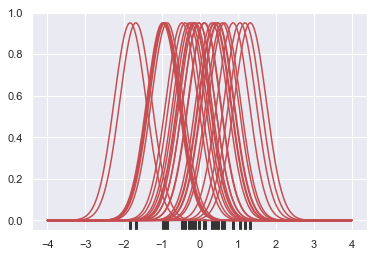

In [23]:
# Observations replaced with curves

x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

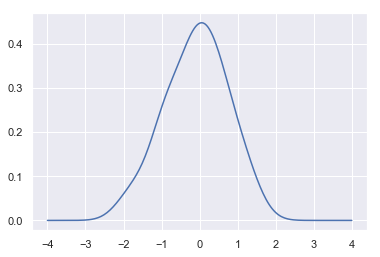

In [24]:
# Curves summed 

from scipy.integrate import trapz

density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);

* using kdeplot( ) - would also provide a direct result

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


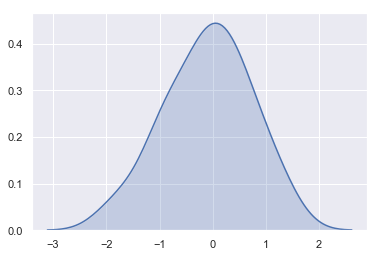

In [25]:
sns.kdeplot(x, shade=True);

* the bw parameter (bandwidth) - controls how tightly the estimates fit the data
* corresponding to the width of the above kernels, it can be manipulated (like bins)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


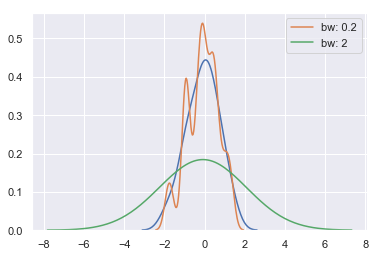

In [26]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

## Bivariate Distributions
### Jointplot( ) - easiest way to view bivariate (joint) relationship, between 2 variables
* along with the univariate (marginal) distribution of each - on separate axes

In [27]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

* Scatterplots

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


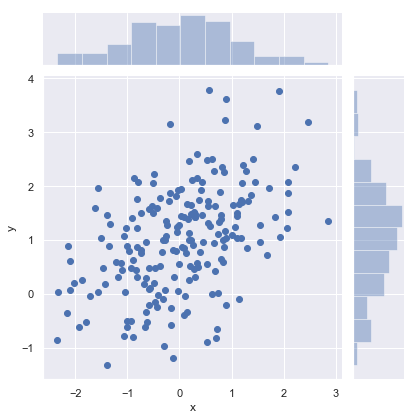

In [28]:
sns.jointplot(x="x", y="y", data=df);

* Hexbin Plots
    * the bivariate analogue of a Histogram, is the Hexbin

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


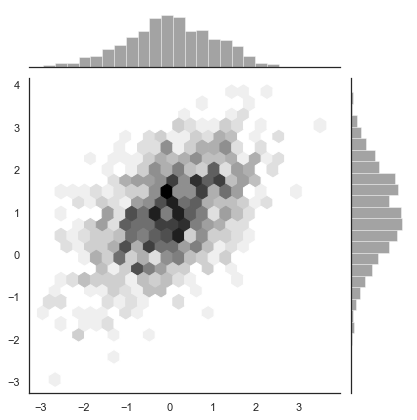

In [29]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

* KDE & jointplot( )
    * the KDE steps (used above) - can be used in a bivariate distribution
    * available in jointplot( ) - as kind='kde'

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


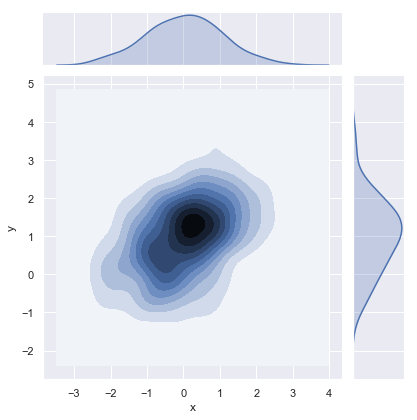

In [30]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

* KDE & rugplot( )
    * kdeplot( ) - allows drawing this plot onto (perhaps pre-existing) matplotlib axes
        * jointplot( ) - produces its own figure

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


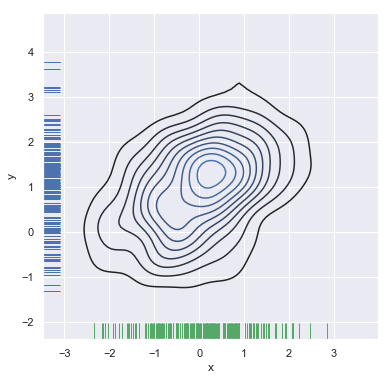

In [31]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

### Increase the Contour Levels
* display the bivariate density more continuously

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


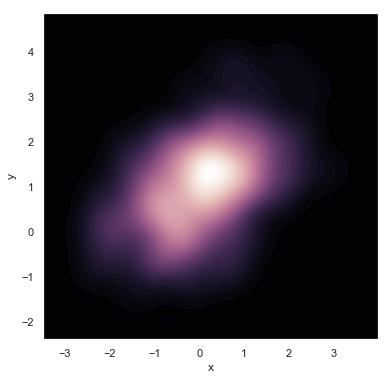

In [32]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

### Jointplot( ) uses JointGrid for figure management
* could also use jointgrid directly

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


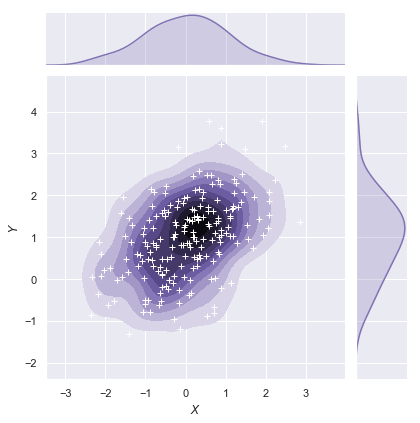

In [33]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

## Plotting Multiple Pairwise Bivariate Distributions
### pairplot( ) - creates a matrix of axes 
* shows relationships between column pairs
    * by default, the univariate distribution of each column runs the diagonal

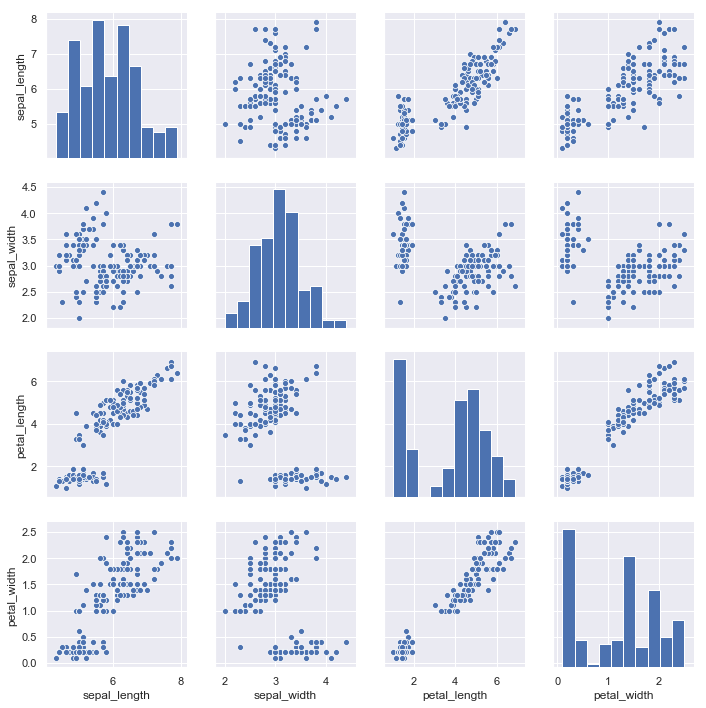

In [34]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

### pairplot( ) - is built on top of a PairGrid object
* similar to jointplot( ) and jointgrid

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


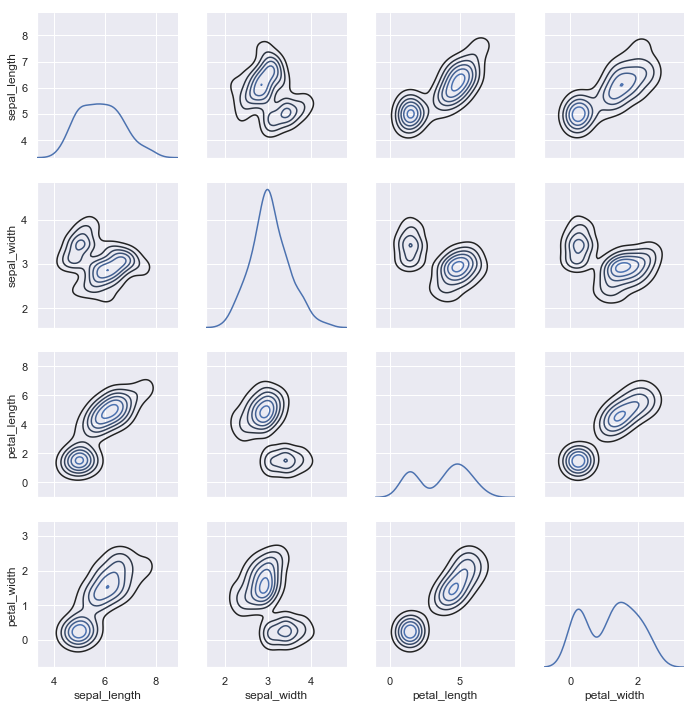

In [35]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);